# Stats for collections

In [107]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from statistics_msmarco import load_qrels, analyze_qrels
import ir_datasets

### MSMARCO Passage Dev set

In [108]:
# MS MARCO Passages dev sets

# File paths
dev1_filepath = "../data/passv2_dev_qrels.tsv"
dev2_filepath = "../data/passv2_dev2_qrels.tsv"


# Load and analyze Dev 1 qrels
dev1_qrels = load_qrels(dev1_filepath)
dev1_stats = analyze_qrels(dev1_qrels)

# Load and analyze Dev 2 qrels
dev2_qrels = load_qrels(dev2_filepath)
dev2_stats = analyze_qrels(dev2_qrels)


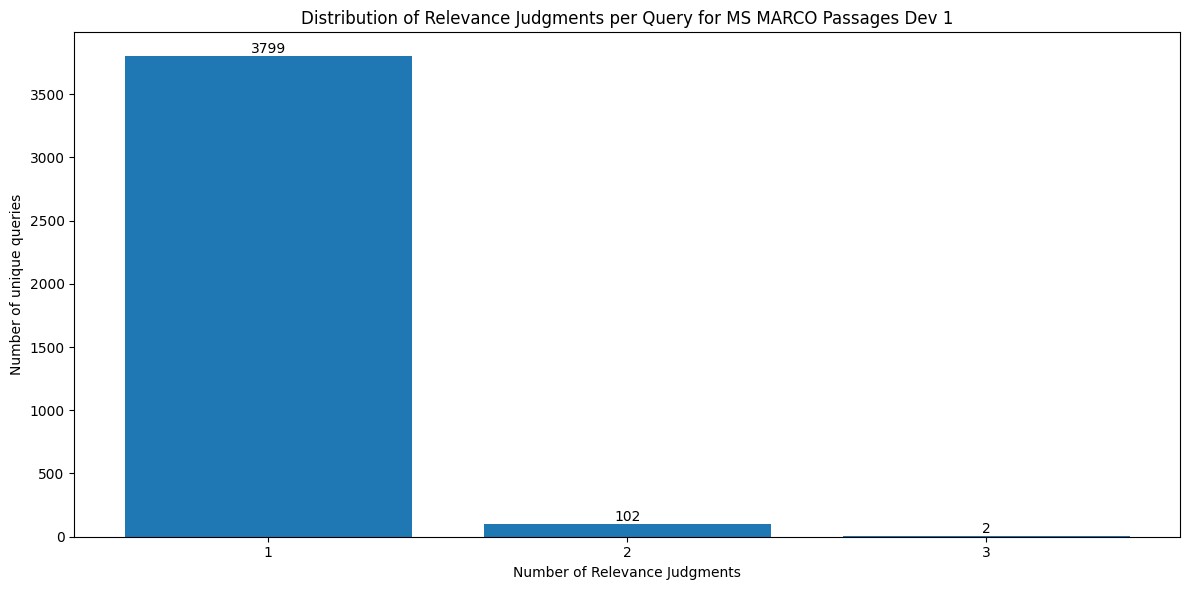

In [109]:
# Dev 1 set
judgements_per_query1 = list(dev1_stats['judgements_per_query'].values())
judgment_count_frequency_dev1 = Counter(judgements_per_query1)
counts_dev1, frequencies_dev1 = zip(*sorted(judgment_count_frequency_dev1.items()))

# Create the figure for Dev 1
plt.figure(figsize=(12, 6))
x_pos_dev1 = np.arange(len(counts_dev1))
bars_dev1 = plt.bar(x_pos_dev1, frequencies_dev1, align='center', label='Dev 1')
for bar in bars_dev1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '%d' % int(yval), ha='center', va='bottom')
plt.xticks(x_pos_dev1, counts_dev1)
plt.title('Distribution of Relevance Judgments per Query for MS MARCO Passages Dev 1')
plt.xlabel('Number of Relevance Judgments')
plt.ylabel('Number of unique queries')
plt.tight_layout()
plt.show()

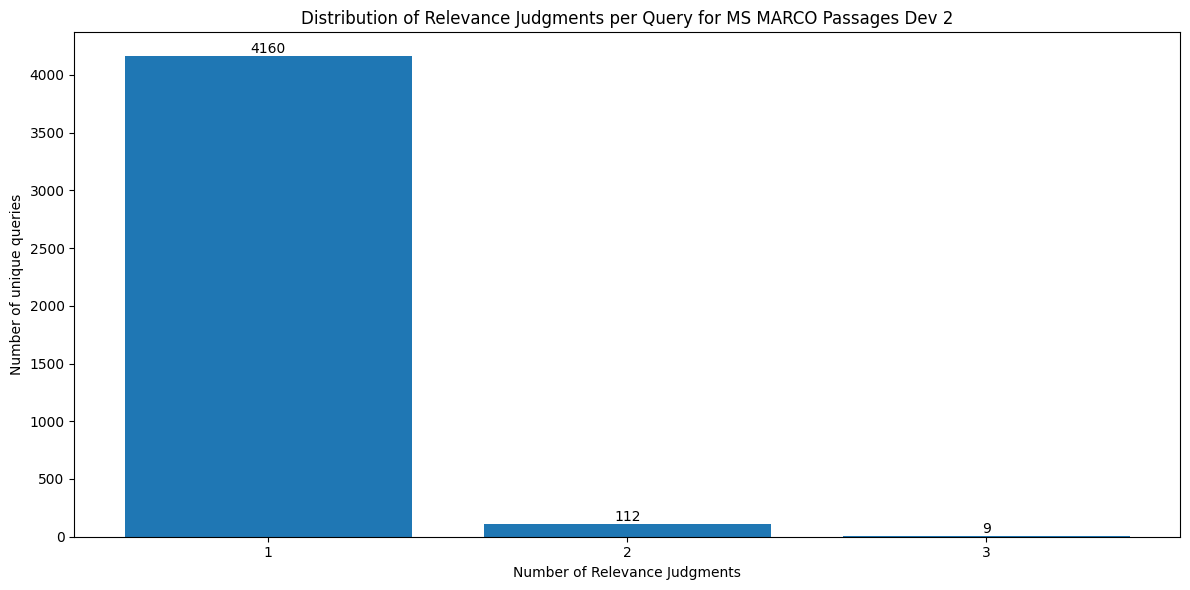

In [110]:
# Dev 2 set
judgements_per_query2 = list(dev2_stats['judgements_per_query'].values())
judgment_count_frequency_dev2 = Counter(judgements_per_query2)
counts_dev2, frequencies_dev2 = zip(*sorted(judgment_count_frequency_dev2.items()))

# Create the figure for Dev 1
plt.figure(figsize=(12, 6))
x_pos_dev2 = np.arange(len(counts_dev2))
bars_dev2 = plt.bar(x_pos_dev2, frequencies_dev2, align='center', label='Dev 1')
for bar in bars_dev2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '%d' % int(yval), ha='center', va='bottom')
plt.xticks(x_pos_dev2, counts_dev2)
plt.title('Distribution of Relevance Judgments per Query for MS MARCO Passages Dev 2')
plt.xlabel('Number of Relevance Judgments')
plt.ylabel('Number of unique queries')
plt.tight_layout()
plt.show()

### MSMARCO Train set

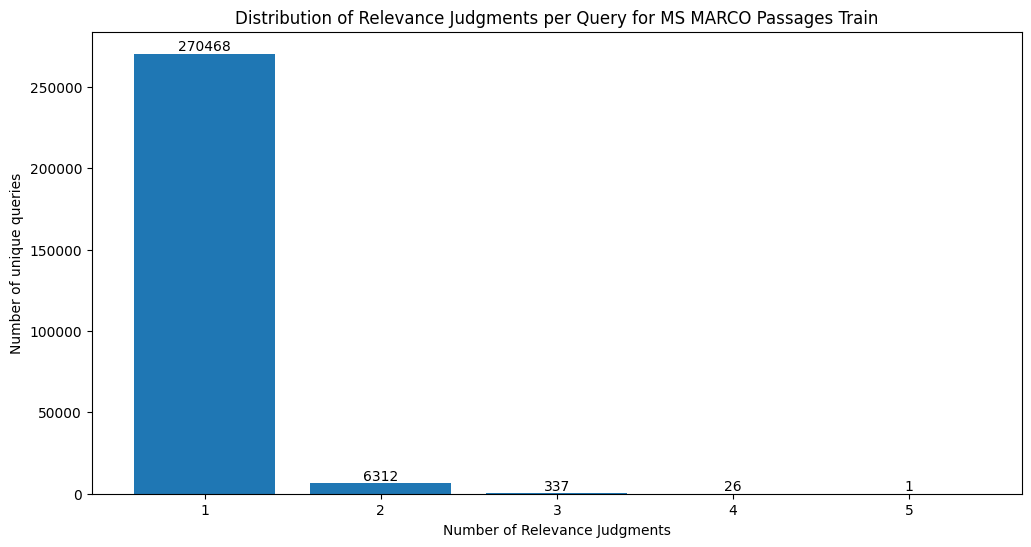

In [111]:
# MSMARCO Passage Train Set

# File paths
train_filepath = "../data/passv2_train_qrels.tsv"

# Load and analyze Train qrels
train_qrels = load_qrels(train_filepath)
train_stats = analyze_qrels(train_qrels)

# Plot the number of judgements per query for train set
judgements_per_query_train = list(train_stats['judgements_per_query'].values())
judgment_count_frequency_train = Counter(judgements_per_query_train)
counts_train, frequencies_train = zip(*sorted(judgment_count_frequency_train.items()))

plt.figure(figsize=(12, 6))
x_pos_train = np.arange(len(counts_train))
bars_train = plt.bar(x_pos_train, frequencies_train, align='center')
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xticks(x_pos_train, counts_train)
plt.title('Distribution of Relevance Judgments per Query for MS MARCO Passages Train')
plt.xlabel('Number of Relevance Judgments')
plt.ylabel('Number of unique queries')
plt.show()

### MSMARCO Validation 1 (TREC test 2021)

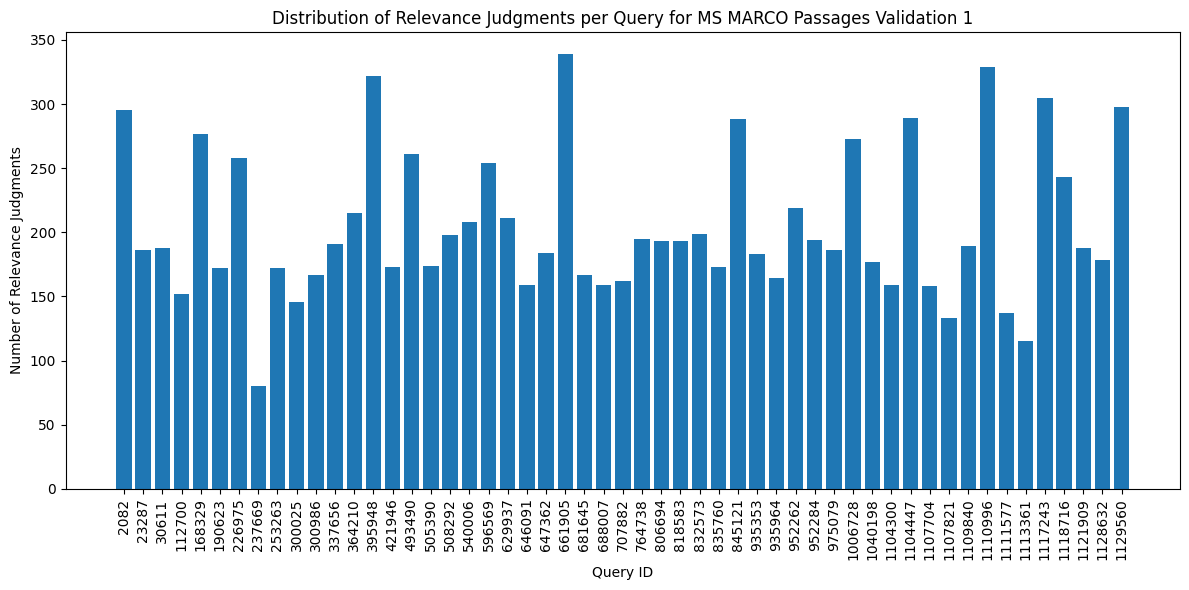

Number of unique queries: 53


In [112]:
# MSMARCO Validation 1 (TREC test 2021)

valditation1_filepath = "../data/2021.qrels.pass.final.txt"

query_judgment_counts_val1 = {}

# Read the file and count the query IDs
with open(valditation1_filepath, 'r') as file:
    for line in file:
        # Split the line into its components: qid, "Q0", docid, relevance
        qid, _, docid, relevance = line.strip().split()
        query_judgment_counts_val1[qid] = query_judgment_counts_val1.get(qid, 0) + 1
        
# Plot the number of judgements per query for validation set 1
sorted_query_ids_val1 = sorted(query_judgment_counts_val1.keys(), key=lambda x: int(x))
judgments_per_query_sorted_val1 = []
for qid in sorted_query_ids_val1:
    judgments_per_query_sorted_val1.append(query_judgment_counts_val1[qid])


# Create the figure
plt.figure(figsize=(12, 6))
x_pos_val1 = range(len(sorted_query_ids_val1))
plt.bar(x_pos_val1, judgments_per_query_sorted_val1, align='center')
plt.xticks(x_pos_val1, sorted_query_ids_val1, rotation=90)
plt.title('Distribution of Relevance Judgments per Query for MS MARCO Passages Validation 1')
plt.xlabel('Query ID')
plt.ylabel('Number of Relevance Judgments')
plt.tight_layout()
plt.show()

num_unique_queries_val1 = len(query_judgment_counts_val1)
print("Number of unique queries:", num_unique_queries_val1)

### Aquaint

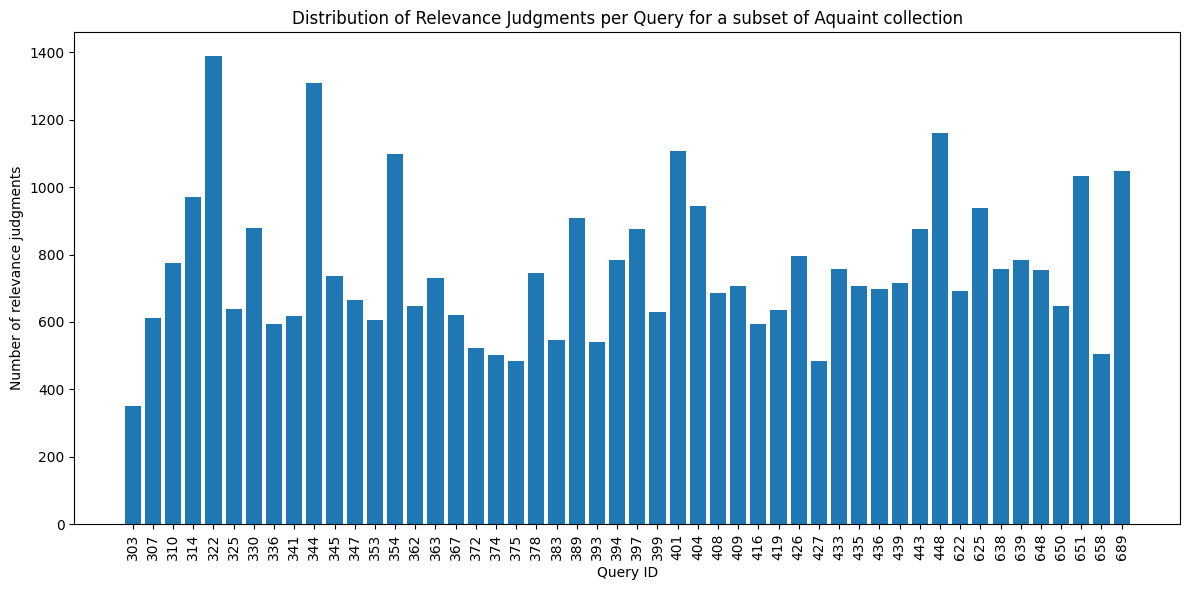

Number of unique queries in AQUAINT (trec-robust-2005): 50


In [113]:
# Aquaint

aquaint_dataset = ir_datasets.load('aquaint/trec-robust-2005')

# Count the number of judgements per query
aquaint_query_judgment_counts = Counter()
for qrel in aquaint_dataset.qrels_iter():
    aquaint_query_judgment_counts[qrel.query_id] += 1

# Get a sorted list of query ids based on the order they appear in the dataset
aquaint_sorted_query_ids = sorted(aquaint_query_judgment_counts.keys(), key=lambda x: int(x))
# Map sorted query ids to their judgment counts
judgments_per_query_sorted_aquaint = []
for qid in aquaint_sorted_query_ids:
    aquaint_count = aquaint_query_judgment_counts[qid]
    judgments_per_query_sorted_aquaint.append(aquaint_count)

plt.figure(figsize=(12, 6))
x_pos_aquaint = np.arange(len(aquaint_sorted_query_ids))
plt.bar(x_pos_aquaint, judgments_per_query_sorted_aquaint, align='center')
plt.xticks(x_pos_aquaint, aquaint_sorted_query_ids, rotation=90)
plt.title('Distribution of Relevance Judgments per Query for a subset of Aquaint collection')
plt.xlabel('Query ID')
plt.ylabel('Number of relevance judgments')
plt.tight_layout()
plt.show()

num_unique_queries_aquaint = len(aquaint_query_judgment_counts)
print("Number of unique queries in AQUAINT (trec-robust-2005):", num_unique_queries_aquaint)


### TREC-CAR